COVID-19 GLOBAL DATA ANALYSIS

Part 1 – Pandas

In [46]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\kavin\Downloads\archive\worldometer_data.csv")
df1=pd.read_csv('full_grouped.csv')
df2=pd.read_csv('day_wise.csv')
df.head(10)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
6,Peru,South America,3.301632e+07,455409,NaN,20424.0,NaN,310337.0,NaN,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas
7,Chile,South America,1.913251e+07,366671,NaN,9889.0,NaN,340168.0,NaN,16614.0,1358.0,19165.0,517.0,1760615.0,92022.0,Americas
8,Colombia,South America,5.093626e+07,357710,NaN,11939.0,NaN,192355.0,NaN,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0,Americas
9,Spain,Europe,4.675665e+07,354530,NaN,28500.0,NaN,NaN,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe


In [47]:
print(df.shape)
print(df.columns.tolist())
print(df.dtypes)

(209, 16)
['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'WHO Region']
Country/Region       object
Continent            object
Population          float64
TotalCases            int64
NewCases            float64
TotalDeaths         float64
NewDeaths           float64
TotalRecovered      float64
NewRecovered        float64
ActiveCases         float64
Serious,Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
WHO Region           object
dtype: object


In [48]:
print(df.isnull().sum())
print(df.duplicated().sum())

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64
0


In [49]:
print(df.describe())

         Population    TotalCases     NewCases    TotalDeaths   NewDeaths  \
count  2.080000e+02  2.090000e+02     4.000000     188.000000    3.000000   
mean   3.041549e+07  9.171850e+04  1980.500000    3792.590426  300.000000   
std    1.047661e+08  4.325867e+05  3129.611424   15487.184877  451.199512   
min    8.010000e+02  1.000000e+01    20.000000       1.000000    1.000000   
25%    9.663140e+05  7.120000e+02    27.500000      22.000000   40.500000   
50%    7.041972e+06  4.491000e+03   656.000000     113.000000   80.000000   
75%    2.575614e+07  3.689600e+04  2609.000000     786.000000  449.500000   
max    1.381345e+09  5.032179e+06  6590.000000  162804.000000  819.000000   

       TotalRecovered  NewRecovered   ActiveCases  Serious,Critical  \
count    2.050000e+02      3.000000  2.050000e+02        122.000000   
mean     5.887898e+04   1706.000000  2.766433e+04        534.393443   
std      2.566984e+05   2154.779803  1.746327e+05       2047.518613   
min      7.000000e+00 

In [50]:
print(df['Country/Region'].nunique())

209


In [51]:
print(df1['Date'].max())

2020-07-27


Part 2 – EDA

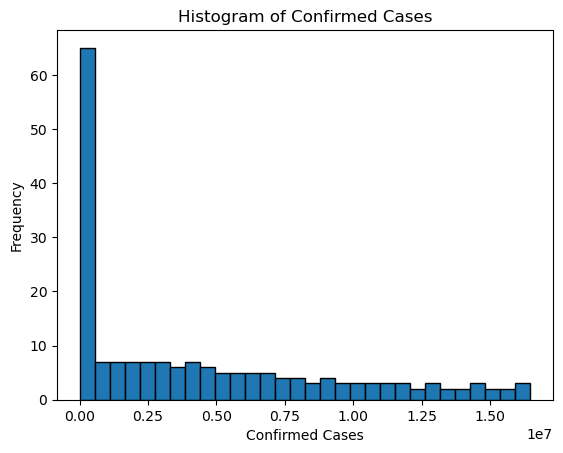

In [52]:
import matplotlib.pyplot as plt

plt.hist(df2['Confirmed'], bins=30, edgecolor='black')
plt.xlabel("Confirmed Cases")
plt.ylabel("Frequency")
plt.title("Histogram of Confirmed Cases")
plt.show()

In [53]:
y = df1['Date'].max()
top_10_countries = df1[df1['Date'] == y].nlargest(10, 'Confirmed')
print(top_10_countries)

             Date  Country/Region  Confirmed  Deaths  Recovered   Active  \
35142  2020-07-27              US    4290259  148011    1325804  2816444   
34992  2020-07-27          Brazil    2442375   87618    1846641   508116   
35048  2020-07-27           India    1480073   33408     951166   495499   
35107  2020-07-27          Russia     816680   13334     602249   201097   
35123  2020-07-27    South Africa     452529    7067     274925   170537   
35080  2020-07-27          Mexico     395489   44022     303810    47657   
35101  2020-07-27            Peru     389717   18418     272547    98752   
35004  2020-07-27           Chile     347923    9187     319954    18782   
35146  2020-07-27  United Kingdom     301708   45844       1437   254427   
35050  2020-07-27            Iran     293606   15912     255144    22550   

       New cases  New deaths  New recovered             WHO Region  
35142      56336        1076          27941               Americas  
34992      23284         

In [54]:
y = df1['Date'].max()
top_10_deaths = df1[df1['Date'] == y].nlargest(10, 'Deaths')
print(top_10_deaths)

             Date  Country/Region  Confirmed  Deaths  Recovered   Active  \
35142  2020-07-27              US    4290259  148011    1325804  2816444   
34992  2020-07-27          Brazil    2442375   87618    1846641   508116   
35146  2020-07-27  United Kingdom     301708   45844       1437   254427   
35080  2020-07-27          Mexico     395489   44022     303810    47657   
35054  2020-07-27           Italy     246286   35112     198593    12581   
35048  2020-07-27           India    1480073   33408     951166   495499   
35030  2020-07-27          France     220352   30212      81212   108928   
35126  2020-07-27           Spain     272421   28432     150376    93613   
35101  2020-07-27            Peru     389717   18418     272547    98752   
35050  2020-07-27            Iran     293606   15912     255144    22550   

       New cases  New deaths  New recovered             WHO Region  
35142      56336        1076          27941               Americas  
34992      23284         

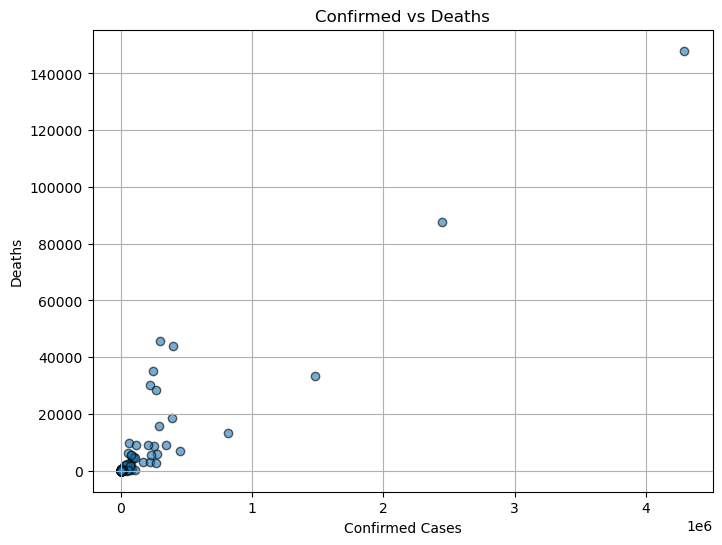

In [55]:
l = df1[df1['Date'] == y]
plt.figure(figsize=(8,6))
plt.scatter(l['Confirmed'], l['Deaths'], alpha=0.6, edgecolor='k')

plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.title("Confirmed vs Deaths")
plt.grid(True)
plt.show()

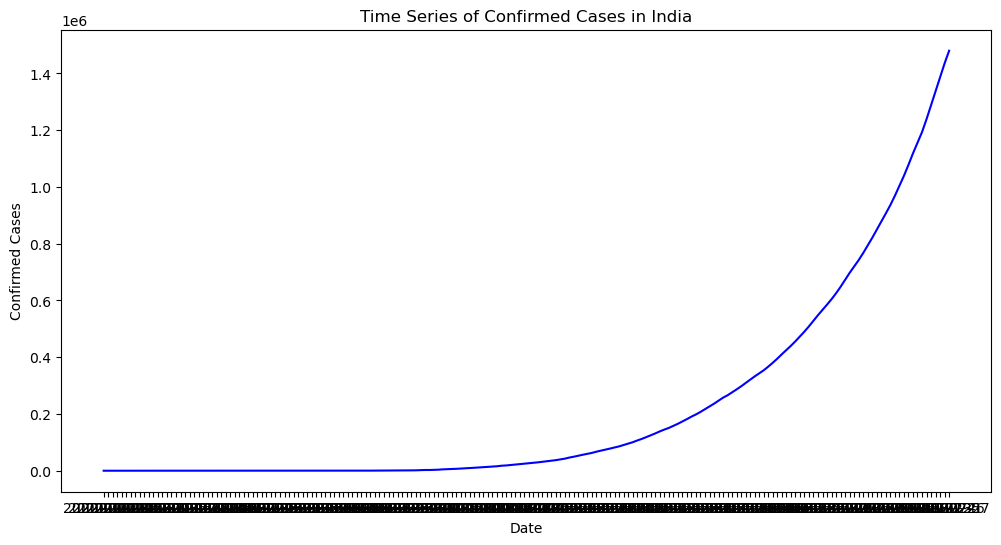

In [56]:
india_data = df1[df1['Country/Region'] == 'India']
plt.figure(figsize=(12,6))
plt.plot(india_data['Date'], india_data['Confirmed'], color='blue')
plt.title('Time Series of Confirmed Cases in India')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

In [57]:
print(df['Continent'].unique())

['North America' 'South America' 'Asia' 'Europe' 'Africa'
 'Australia/Oceania' nan]


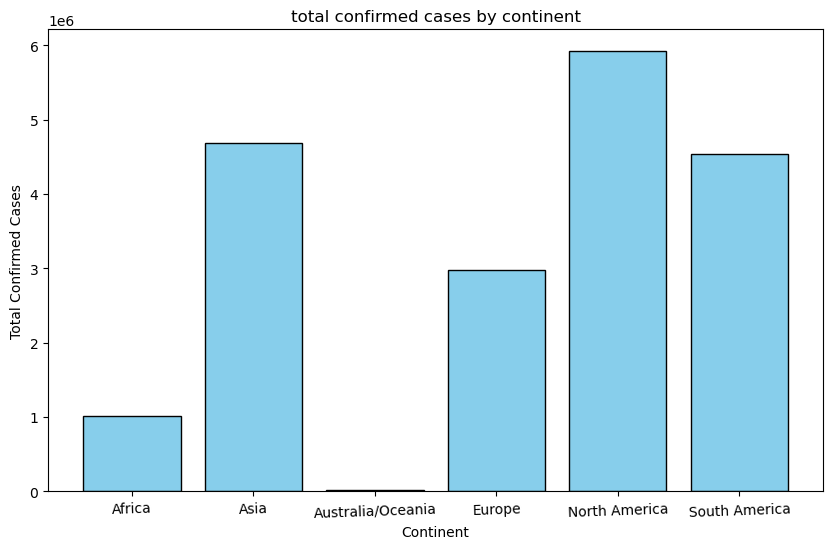

In [58]:
c = df.groupby('Continent', as_index=False)['TotalCases'].sum()

plt.figure(figsize=(10,6))
plt.bar(c['Continent'], c['TotalCases'],color='skyblue', edgecolor='black')
plt.title("total confirmed cases by continent")
plt.xlabel("Continent")
plt.ylabel("Total Confirmed Cases")
plt.xticks(rotation=2)

plt.show()


Part 3 – Statistics

In [59]:

print(df['TotalCases'].mean())
print(df['TotalCases'].median())
print(df['TotalCases'].mode()[0])

91718.4976076555
4491.0
13


In [60]:
print(df['TotalDeaths'].var())
print(df['TotalDeaths'].std())

239852895.4195872
15487.184877168194


In [61]:
df['TotalCases'].corr(df['TotalDeaths'])


np.float64(0.9386219031238764)

In [62]:
(df['TotalCases'] > 100000).mean().round(2)

np.float64(0.12)

In [63]:
death_rate = df['TotalDeaths'] / df['TotalCases']
b=(death_rate > 0.05).mean().round(2)
print(b)

0.16



Part 4 – Linear Algebra & NumPy

In [64]:
latest_df = df1[df1['Date'] == df1['Date'].max()]
valid_cases_df = latest_df[latest_df['Confirmed'] > 0].copy()
confirmed = np.array(valid_cases_df['Confirmed'])
deaths = np.array(valid_cases_df['Deaths'])
print(confirmed)
print(deaths)

[  36263    4880   27973     907     950      86  167416   37390   15303
   20558   30446     382   39482  226225     110   67251   66428      48
    1770      99   71181   10498     739 2442375     141   10621    1100
     350     378    2328     226   17110  116458    4599     922  347923
   86783  257101     354    3200    8844   15841   15655    4881    2532
    1060   15516   13761    5059      18   64156   81161   92482   15035
    3071     265    2034    2316   14547      27    7398  220352    7189
     326    1137  207112   33624    4227      14      23   45309    7055
    1954     389    7340      12   39741    4448    1854 1480073  100303
  293606  112585   25892   63985  246286     853   31142    1176   84648
   17975    7413   64379   33296      20    1219    3882     505    1167
    2827      86    2019    6321    9690    3664    8904    3369    2513
     701    6208     344  395489   23154     116     289    2893   20887
    1701    1843   18752   53413    1557    3439   

In [65]:
print(confirmed-deaths)

[  34994    4736   26810     855     909      83  164357   36679   15136
   19845   30023     371   39341  223260     103   66713   56606      46
    1735      99   68534   10204     737 2354757     138   10274    1047
     344     377    2306     226   16719  107514    4540     847  338736
   82127  248324     347    3146    8636   15726   15559    4742    2445
    1041   15143   13148    5001      18   63073   75629   87830   14627
    3020     265    1965    2282   14319      27    7069  190140    7140
     318    1121  197987   33456    4025      14      23   43548    7010
    1928     369    7182      12   38575    3852    1844 1446665   95465
  277694  108127   24128   63511  211174     843   30144    1165   84063
   17690    7228   63941   31995      20    1188    3831     493    1095
    2763      85    1939    6209    9599    3565    8780    3354    2389
     692    6052     334  351467   22406     112     289    2848   20571
    1690    1835   18704   47253    1535    3331   

In [66]:
print(np.dot(confirmed,deaths))

997285387205


In [67]:
weight = np.array([confirmed, deaths]).T
weights = np.array([0.7, 0.3])
c = np.dot(weight, weights)
print(c)

[2.5764800e+04 3.4592000e+03 1.9930000e+04 6.5050000e+02 6.7730000e+02
 6.1100000e+01 1.1810890e+05 2.6386300e+04 1.0762200e+04 1.4604500e+04
 2.1439100e+04 2.7070000e+02 2.7679700e+04 1.5924700e+05 7.9100000e+01
 4.7237100e+04 4.9446200e+04 3.4200000e+01 1.2495000e+03 6.9300000e+01
 5.0620800e+04 7.4368000e+03 5.1790000e+02 1.7359479e+06 9.9600000e+01
 7.5388000e+03 7.8590000e+02 2.4680000e+02 2.6490000e+02 1.6362000e+03
 1.5820000e+02 1.2094300e+04 8.4203800e+04 3.2370000e+03 6.6790000e+02
 2.4630220e+05 6.2144900e+04 1.8260380e+05 2.4990000e+02 2.2562000e+03
 6.2532000e+03 1.1123200e+04 1.0987300e+04 3.4584000e+03 1.7985000e+03
 7.4770000e+02 1.0973100e+04 9.8166000e+03 3.5587000e+03 1.2600000e+01
 4.5234100e+04 5.8472300e+04 6.6133000e+04 1.0646900e+04 2.1650000e+03
 1.8550000e+02 1.4445000e+03 1.6314000e+03 1.0251300e+04 1.8900000e+01
 5.2773000e+03 1.6331000e+05 5.0470000e+03 2.3060000e+02 8.0070000e+02
 1.4771590e+05 2.3587200e+04 3.0195000e+03 9.8000000e+00 1.6100000e+01
 3.224

In [68]:
n = (confirmed - np.min(confirmed)) / (np.max(confirmed) - np.min(confirmed))
print(n)

[8.45009229e-03 1.13513225e-03 6.51780351e-03 2.09078774e-04
 2.19101502e-04 1.77145895e-05 3.90201128e-02 8.71278101e-03
 3.56459497e-03 4.78946560e-03 7.09422693e-03 8.67082540e-05
 9.20039839e-03 5.27277088e-02 2.33086704e-05 1.56729831e-02
 1.54811527e-02 8.85729476e-06 4.10232600e-04 2.07447167e-05
 1.65890138e-02 2.44461335e-03 1.69920207e-04 5.69282809e-01
 3.05343583e-05 2.47328302e-03 2.54064508e-04 7.92494795e-05
 8.57759072e-05 5.40294981e-04 5.03467281e-05 3.98578264e-03
 2.71424805e-02 1.06963489e-03 2.12575074e-04 8.10938946e-02
 2.02256326e-02 5.99244939e-02 8.01818263e-05 7.43546587e-04
 2.05908795e-03 3.68999562e-03 3.64664149e-03 1.13536534e-03
 5.87844668e-04 2.44741040e-04 3.61424244e-03 3.20517527e-03
 1.17685477e-03 1.86469363e-06 1.49515797e-02 1.89152191e-02
 2.15539937e-02 3.50212773e-03 7.13478402e-04 5.94371096e-05
 4.71767489e-04 5.37497940e-04 3.38838142e-03 3.96247397e-06
 1.72204457e-03 5.13587906e-02 1.67332945e-03 7.36553986e-05
 2.62688716e-04 4.827272

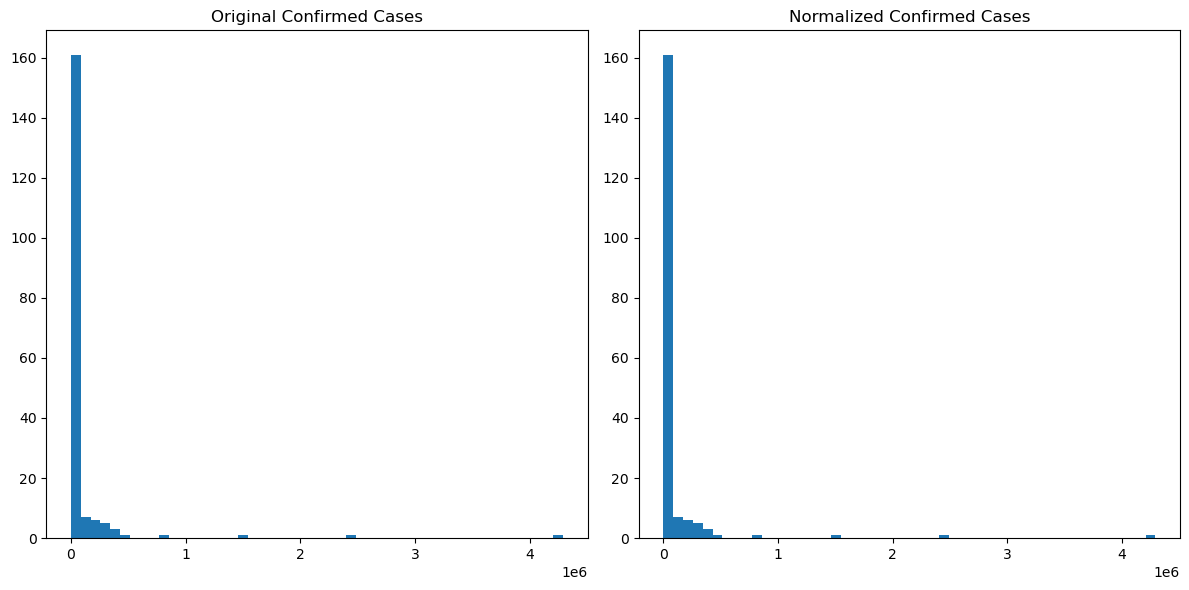

In [69]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(confirmed, bins=50)
plt.title("Original Confirmed Cases")
plt.subplot(1, 2, 2)
plt.hist(confirmed, bins=50)
plt.title("Normalized Confirmed Cases")
plt.tight_layout()
plt.show()

Part 5 – Calculus

In [70]:
sample_data = valid_cases_df[['Country/Region', 'Confirmed', 'Deaths']].head(5).copy()
sample_data['dS_dDeaths'] = 100 / sample_data['Confirmed']
print(sample_data[['Country/Region', 'Confirmed', 'dS_dDeaths']])

      Country/Region  Confirmed  dS_dDeaths
34969    Afghanistan      36263    0.002758
34970        Albania       4880    0.020492
34971        Algeria      27973    0.003575
34972        Andorra        907    0.110254
34973         Angola        950    0.105263


Part 6 – Feature Engineering

In [71]:
df1['death_rate'] = (df1['Deaths'] / df1['Confirmed']) * 100
df1

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,death_rate
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,NaN
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,NaN
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,NaN
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,NaN
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,NaN
...,...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean,0.734394
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,10.000000
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,28.562980
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,3.075571


In [72]:
df1['recovery_rate'] = (df1['Recovered'] / df1['Confirmed']) * 100
df1

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,death_rate,recovery_rate
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,NaN,NaN
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,NaN,NaN
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,NaN,NaN
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,NaN,NaN
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean,0.734394,35.326240
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,10.000000,80.000000
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,28.562980,49.260792
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,3.075571,61.840949


In [73]:
df1['high_risk'] = np.where(df1['death_rate'] > 5 ,1 ,0)
df1

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,death_rate,recovery_rate,high_risk
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,NaN,NaN,0
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,NaN,NaN,0
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,NaN,NaN,0
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,NaN,NaN,0
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean,0.734394,35.326240,0
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,10.000000,80.000000,1
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,28.562980,49.260792,1
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,3.075571,61.840949,0


In [74]:
df1['quartiles'] = pd.qcut(df1['Confirmed'], 4, labels=False)
df1

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,death_rate,recovery_rate,high_risk,quartiles
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,NaN,NaN,0,0
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,NaN,NaN,0,0
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,NaN,NaN,0,0
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,NaN,NaN,0,0
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean,0.734394,35.326240,0,3
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,10.000000,80.000000,1,1
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,28.562980,49.260792,1,2
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,3.075571,61.840949,0,3


In [75]:
df1['active_cases'] = df1['Confirmed'] - (df1['Deaths'] + df1['Recovered'])
df1

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,death_rate,recovery_rate,high_risk,quartiles,active_cases
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,NaN,NaN,0,0,0
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,NaN,NaN,0,0,0
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,NaN,NaN,0,0,0
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,NaN,NaN,0,0,0
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean,0.734394,35.326240,0,3,6791
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,10.000000,80.000000,1,1,1
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,28.562980,49.260792,1,2,375
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,3.075571,61.840949,0,3,1597


In [76]:
avg = df1['Confirmed'].mean()
df1['above_average_confirmed'] = (df1['Confirmed'] > avg).astype(int)
df1

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,death_rate,recovery_rate,high_risk,quartiles,active_cases,above_average_confirmed
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,NaN,NaN,0,0,0,0
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,NaN,NaN,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,NaN,NaN,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,NaN,NaN,0,0,0,0
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean,0.734394,35.326240,0,3,6791,0
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,10.000000,80.000000,1,1,1,0
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,28.562980,49.260792,1,2,375,0
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,3.075571,61.840949,0,3,1597,0


Part 7 – SQL Simulation in Pandas

In [77]:
df1[df1['death_rate'] > 5]

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,death_rate,recovery_rate,high_risk,quartiles,active_cases,above_average_confirmed
2190,2020-02-02,Philippines,2,1,0,1,1,1,0,Western Pacific,50.000000,0.000000,1,1,1,0
2377,2020-02-03,Philippines,2,1,0,1,0,0,0,Western Pacific,50.000000,0.000000,1,1,1,0
2564,2020-02-04,Philippines,2,1,0,1,0,0,0,Western Pacific,50.000000,0.000000,1,1,1,0
2751,2020-02-05,Philippines,2,1,0,1,0,0,0,Western Pacific,50.000000,0.000000,1,1,1,0
2938,2020-02-06,Philippines,2,1,0,1,0,0,0,Western Pacific,50.000000,0.000000,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35132,2020-07-27,Syria,674,40,0,634,24,2,0,Eastern Mediterranean,5.934718,0.000000,1,2,634,0
35139,2020-07-27,Trinidad and Tobago,148,8,128,12,1,0,0,Americas,5.405405,86.486486,1,1,12,0
35146,2020-07-27,United Kingdom,301708,45844,1437,254427,688,7,3,Europe,15.194824,0.476288,1,3,254427,1
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,10.000000,80.000000,1,1,1,0


In [78]:
df1.sort_values(by='Confirmed', ascending=False)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,death_rate,recovery_rate,high_risk,quartiles,active_cases,above_average_confirmed
35142,2020-07-27,US,4290259,148011,1325804,2816444,56336,1076,27941,Americas,3.449932,30.902656,0,3,2816444,1
34955,2020-07-26,US,4233923,146935,1297863,2789125,54953,470,18449,Americas,3.470422,30.653911,0,3,2789125,1
34768,2020-07-25,US,4178970,146465,1279414,2753091,66439,905,17790,Americas,3.504811,30.615534,0,3,2753091,1
34581,2020-07-24,US,4112531,145560,1261624,2705347,73715,1130,28355,Americas,3.539426,30.677556,0,3,2705347,1
34394,2020-07-23,US,4038816,144430,1233269,2661117,68695,1114,22420,Americas,3.576048,30.535409,0,3,2661117,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2020-01-22,Austria,0,0,0,0,0,0,0,Europe,NaN,NaN,0,0,0,0
8,2020-01-22,Australia,0,0,0,0,0,0,0,Western Pacific,NaN,NaN,0,0,0,0
7,2020-01-22,Armenia,0,0,0,0,0,0,0,Europe,NaN,NaN,0,0,0,0
6,2020-01-22,Argentina,0,0,0,0,0,0,0,Americas,NaN,NaN,0,0,0,0


In [79]:
df1['Continent'] = df1['WHO Region']
df1.groupby('Continent')['death_rate'].mean().reset_index()

,Continent,death_rate
0,Africa,2.927714
1,Americas,3.966318
2,Eastern Mediterranean,3.326772
3,Europe,3.621865
4,South-East Asia,1.632960
5,Western Pacific,1.760040


In [80]:
df1.sort_values(by='recovery_rate', ascending=False).head(5)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,death_rate,recovery_rate,high_risk,quartiles,active_cases,above_average_confirmed,Continent
33834,2020-07-20,Uganda,1069,0,1071,-2,4,0,48,Africa,0.0,100.187091,0,2,-2,0,Africa
28679,2020-06-23,Greenland,13,0,13,0,0,0,0,Europe,0.0,100.000000,0,1,0,0,Europe
6418,2020-02-25,Finland,1,0,1,0,0,0,0,Europe,0.0,100.000000,0,0,0,0,Europe
28572,2020-06-22,Seychelles,11,0,11,0,0,0,0,Africa,0.0,100.000000,0,1,0,0,Africa
18581,2020-04-30,Greenland,11,0,11,0,0,0,0,Europe,0.0,100.000000,0,1,0,0,Europe


In [81]:
print(df1[(df1['Confirmed'] > 1_000_000) & (df1['death_rate'] < 2)])

Empty DataFrame
Columns: [Date, Country/Region, Confirmed, Deaths, Recovered, Active, New cases, New deaths, New recovered, WHO Region, death_rate, recovery_rate, high_risk, quartiles, active_cases, above_average_confirmed, Continent]
Index: []


Part 8 – Insights

In [82]:
df1.sort_values('Confirmed', ascending=False).iloc[0]

Date                       2020-07-27
Country/Region                     US
Confirmed                     4290259
Deaths                         148011
Recovered                     1325804
Active                        2816444
New cases                       56336
New deaths                       1076
New recovered                   27941
WHO Region                   Americas
death_rate                   3.449932
recovery_rate               30.902656
high_risk                           0
quartiles                           3
active_cases                  2816444
above_average_confirmed             1
Continent                    Americas
Name: 35142, dtype: object

In [83]:
df1[df1['Confirmed'] > 10000].sort_values('death_rate', ascending=False).iloc[0]

Date                       2020-05-06
Country/Region                Belgium
Confirmed                       50781
Deaths                           8339
Recovered                       12731
Active                          29711
New cases                         272
New deaths                        323
New recovered                     290
WHO Region                     Europe
death_rate                  16.421496
recovery_rate                 25.0704
high_risk                           1
quartiles                           3
active_cases                    29711
above_average_confirmed             1
Continent                      Europe
Name: 19651, dtype: object

In [84]:
df1[df1['Confirmed'] > 10000].sort_values('death_rate', ascending=False).iloc[0]

Date                       2020-05-06
Country/Region                Belgium
Confirmed                       50781
Deaths                           8339
Recovered                       12731
Active                          29711
New cases                         272
New deaths                        323
New recovered                     290
WHO Region                     Europe
death_rate                  16.421496
recovery_rate                 25.0704
high_risk                           1
quartiles                           3
active_cases                    29711
above_average_confirmed             1
Continent                      Europe
Name: 19651, dtype: object

In [85]:
df1[['Confirmed', 'Deaths']].corr().iloc[0,1]

np.float64(0.9120159504553663)

In [86]:
h = df1[df1['death_rate'] > 5]
percentile = (h['Confirmed'].rank(pct=True).mean()*100)
print(percentile)

50.00917262887543


In [93]:
f = df1.groupby('Confirmed')['death_rate'].mean()
print(f)

Confirmed
0               NaN
1          1.000000
2          2.507837
3          5.402299
4          3.080569
             ...   
4038816    3.576048
4112531    3.539426
4178970    3.504811
4233923    3.470422
4290259    3.449932
Name: death_rate, Length: 10732, dtype: float64


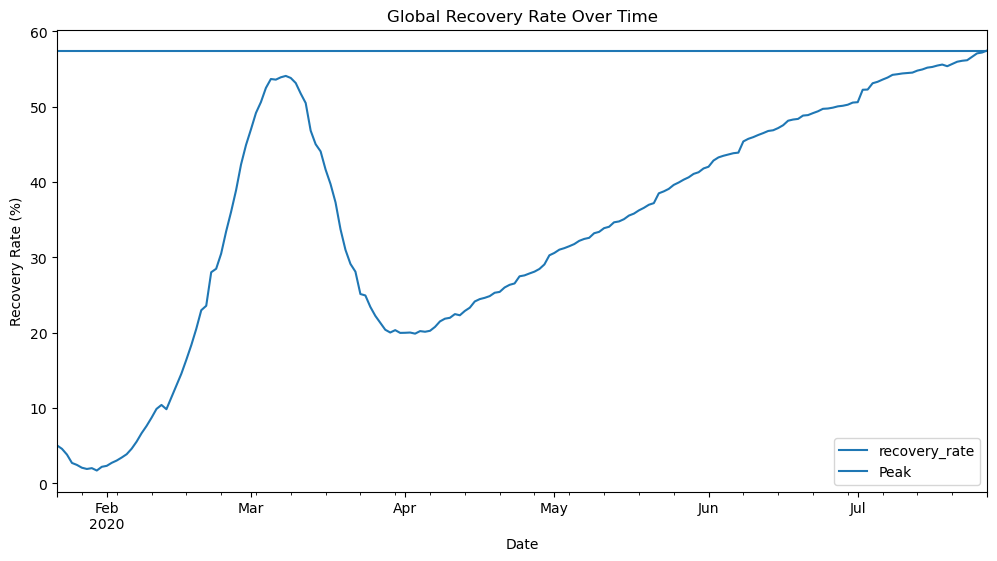

In [92]:
df1['Date'] = pd.to_datetime(df1['Date'])
global_daily = df1.groupby('Date')[['Confirmed', 'Recovered']].sum()
global_daily['recovery_rate'] = (global_daily['Recovered'] / global_daily['Confirmed']) * 100

plt.figure(figsize=(12,6))
global_daily['recovery_rate'].plot()
plt.title("Global Recovery Rate Over Time")
plt.ylabel("Recovery Rate (%)")
plt.axhline(y=global_daily['recovery_rate'].max(), label='Peak')
plt.legend()
plt.show()